In [1]:
# importing neccesary libraries
import pandas as pd
import numpy as np

In [2]:
# reading the training data
train_df = pd.read_csv('network attack train.csv')
train_df.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,1,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
1,2,0,tcp,http,SF,54540,8314,0,0,0,...,178,1.0,0.0,0.01,0.00,0.00,0.0,0.01,0.01,back.
2,3,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,86,1.0,0.0,1.00,0.51,0.00,0.0,0.00,0.00,ipsweep.
4,5,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.07,0.0,0.93,1.00,satan.


In [3]:
train_df['type_of_attack'].value_counts()

type_of_attack
ipsweep.      5318
satan.        3711
portsweep.    1999
back.         1400
normal.        561
Name: count, dtype: int64

In [4]:
# reading the testing data
test_df = pd.read_csv('network attack test.csv')
test_df.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
1,2,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
2,3,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,1,117,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
4,5,0,icmp,eco_i,SF,8,0,0,0,0,...,1,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0


## Data Cleaning and Prepocessing

In [5]:
# checking if the training and testing data have the same column names
if train_df.columns.tolist() == test_df.columns.tolist():
    print('Both datasets have the same column names')
else:
    print('Column names are different')

Column names are different


In [6]:
# displaying the difference
diff = set(train_df.columns) ^ set(test_df.columns)
print('Different column names:',diff)

Different column names: {'type_of_attack'}


The only difference between the training and testing data should be the 'type of attack' column because that is the target column

In [7]:
# check for missing values in the training data

train_df.isnull().sum()

Id                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [8]:
#check for missing values in the testing data

test_df.isnull().sum()

Id                             0
duration                       0
protocol_type                  0
service                        0
flag                           1
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [9]:
# computing the mode of the 'flag' column
test_df['flag'].mode()

0    SF
Name: flag, dtype: object

In [10]:
# filling the missing value in the 'flag' column with the most occuring value
test_df['flag'] = test_df['flag'].fillna('SF')

In [11]:
# confirming there is no missing value left
test_df.isnull().sum()

Id                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12989 entries, 0 to 12988
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           12989 non-null  int64  
 1   duration                     12989 non-null  int64  
 2   protocol_type                12989 non-null  object 
 3   service                      12989 non-null  object 
 4   flag                         12989 non-null  object 
 5   src_bytes                    12989 non-null  int64  
 6   dst_bytes                    12989 non-null  int64  
 7   land                         12989 non-null  int64  
 8   wrong_fragment               12989 non-null  int64  
 9   urgent                       12989 non-null  int64  
 10  hot                          12989 non-null  int64  
 11  num_failed_logins            12989 non-null  int64  
 12  logged_in                    12989 non-null  int64  
 13  num_compromised 

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           5567 non-null   int64  
 1   duration                     5567 non-null   int64  
 2   protocol_type                5567 non-null   object 
 3   service                      5567 non-null   object 
 4   flag                         5567 non-null   object 
 5   src_bytes                    5567 non-null   int64  
 6   dst_bytes                    5567 non-null   int64  
 7   land                         5567 non-null   int64  
 8   wrong_fragment               5567 non-null   int64  
 9   urgent                       5567 non-null   int64  
 10  hot                          5567 non-null   int64  
 11  num_failed_logins            5567 non-null   int64  
 12  logged_in                    5567 non-null   int64  
 13  num_compromised   

In [14]:
# checking the shape of the training data
train_df.shape

(12989, 43)

In [15]:
# checking the shape of the testing data
test_df.shape

(5567, 42)

### Dataset Description

This is the description of the columns of the datasets:

Id: Unique identifier for each record.
duration: Length (in seconds) of the connection.
protocol_type: Type of protocol (e.g., TCP, UDP, ICMP).
service: Network service on the destination (e.g., HTTP, FTP).
flag: Status of the connection (e.g., SF, REJ).
src_bytes: Bytes sent from the source to the destination.
dst_bytes: Bytes sent from the destination to the source.
land: 1 if the connection is from the same source/destination IP and port; 0 otherwise.
wrong_fragment: Number of wrong fragments in the connection.
urgent: Number of urgent packets.
hot: Number of "hot" indicators (i.e., suspicious behavior).
num_failed_logins: Number of failed login attempts.
logged_in: 1 if successfully logged in; 0 otherwise.
num_compromised: Number of compromised conditions.
root_shell: 1 if root shell is obtained; 0 otherwise.
su_attempted: 1 if su command was attempted; 0 otherwise.
num_root: Number of root accesses.
num_file_creations: Number of file creation operations.
num_shells: Number of shell prompts invoked.
num_access_files: Number of file access operations.
num_outbound_cmds: Number of outbound commands in an FTP session.
is_host_login: 1 if the login is a host login; 0 otherwise.
is_guest_login: 1 if the login is a guest login; 0 otherwise.
count: Number of connections to the same host as the current connection in the past 2 seconds.
srv_count: Number of connections to the same service as the current connection in the past 2 seconds.
serror_rate: % of connections that have "SYN" errors.
srv_serror_rate: % of connections that have "SYN" errors to the same service.
rerror_rate: % of connections that have "REJ" errors.
srv_rerror_rate: % of connections that have "REJ" errors to the same service.
same_srv_rate: % of connections to the same service.
diff_srv_rate: % of connections to different services.
srv_diff_host_rate: % of connections to different hosts.
dst_host_count: Number of connections to the same destination host as the current connection.
dst_host_srv_count: Number of connections to the same service as the current connection to the destination host.
dst_host_same_srv_rate: % of connections to the same service on the destination host.
dst_host_diff_srv_rate: % of connections to different services on the destination host.
dst_host_same_src_port_rate: % of connections from the same source port.
dst_host_srv_diff_host_rate: % of connections to different hosts on the same service.
dst_host_serror_rate: % of connections with "SYN" errors on the destination host.
dst_host_srv_serror_rate: % of connections with "SYN" errors to the same service on the destination host.
dst_host_rerror_rate: % of connections with "REJ" errors on the destination host.
dst_host_srv_rerror_rate: % of connections with "REJ" errors to the same service on the destination host.
type_of_attack: Label indicating the type of network attack (target variable).

In [16]:
train_df.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,1,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
1,2,0,tcp,http,SF,54540,8314,0,0,0,...,178,1.0,0.0,0.01,0.00,0.00,0.0,0.01,0.01,back.
2,3,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,86,1.0,0.0,1.00,0.51,0.00,0.0,0.00,0.00,ipsweep.
4,5,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.07,0.0,0.93,1.00,satan.


In [17]:
# checking the summary statistics
train_df.describe()

,Id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,12989.000000,12989.000000,12989.000000,12989.000000,12989.0,12989.0,12989.0,12989.000000,12989.0,12989.000000,...,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000
mean,6495.000000,0.157056,5865.168065,1097.630072,0.0,0.0,0.0,0.212795,0.0,0.153668,...,139.733929,111.833397,0.514449,0.438340,0.509831,0.218841,0.019981,0.027064,0.421735,0.438319
std,3749.745658,1.817548,16851.470935,4153.357121,0.0,0.0,0.0,0.614088,0.0,0.360645,...,121.745589,120.355996,0.496275,0.480339,0.483347,0.282489,0.051303,0.157883,0.456708,0.490593
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6495.000000,0.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,255.000000,22.000000,1.000000,0.000000,0.540000,0.000000,0.000000,0.000000,0.050000,0.040000
75%,9742.000000,0.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,0.500000,0.010000,0.000000,0.940000,1.000000
max,12989.000000,78.000000,54540.000000,238768.000000,0.0,0.0,0.0,2.000000,0.0,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,0.580000,1.000000,1.000000,1.000000


In [18]:
train_df.columns = train_df.columns.str.replace('_',' ')

In [19]:
test_df.columns = test_df.columns.str.replace('_',' ')

In [20]:
test_df.to_csv('cleaned_test_df.csv')

In [21]:
train_df

,Id,duration,protocol type,service,flag,src bytes,dst bytes,land,wrong fragment,urgent,...,dst host srv count,dst host same srv rate,dst host diff srv rate,dst host same src port rate,dst host srv diff host rate,dst host serror rate,dst host srv serror rate,dst host rerror rate,dst host srv rerror rate,type of attack
0,1,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
1,2,0,tcp,http,SF,54540,8314,0,0,0,...,178,1.00,0.0,0.01,0.00,0.00,0.0,0.01,0.01,back.
2,3,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,86,1.00,0.0,1.00,0.51,0.00,0.0,0.00,0.00,ipsweep.
4,5,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.0,0.00,0.00,0.07,0.0,0.93,1.00,satan.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,12985,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.0,0.00,0.00,0.13,0.0,0.87,1.00,satan.
12985,12986,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.0,0.00,0.00,0.02,0.0,0.98,1.00,satan.
12986,12987,0,icmp,eco_i,SF,8,0,0,0,0,...,255,1.00,0.0,1.00,0.50,0.00,0.0,0.00,0.00,ipsweep.
12987,12988,0,tcp,private,REJ,0,0,0,0,0,...,2,0.12,1.0,0.12,1.00,0.00,0.0,0.62,1.00,ipsweep.


## Exploratory Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([0, 1, 2]), [Text(0, 0, 'tcp'), Text(1, 0, 'icmp'), Text(2, 0, 'udp')])

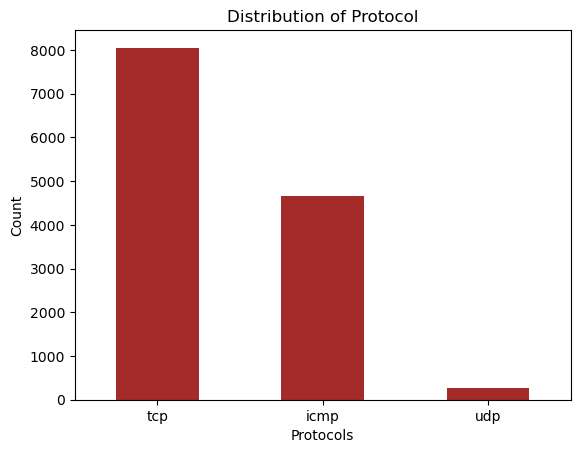

In [23]:
train_df['protocol type'].value_counts().plot(kind='bar',color='brown')
plt.xlabel('Protocols')
plt.ylabel('Count')
plt.title('Distribution of Protocol')
plt.xticks(rotation=(0))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ipsweep.'),
  Text(1, 0, 'satan.'),
  Text(2, 0, 'portsweep.'),
  Text(3, 0, 'back.'),
  Text(4, 0, 'normal.')])

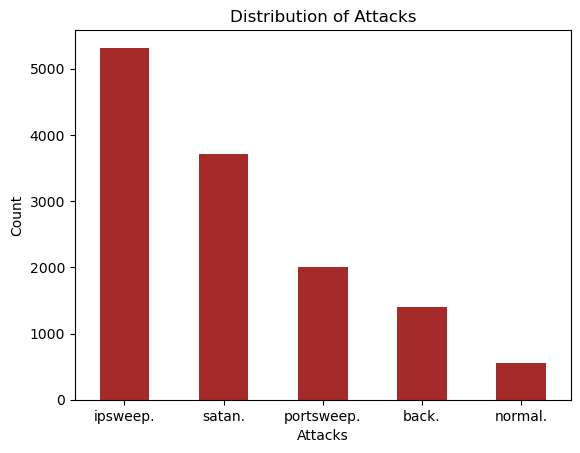

In [24]:
train_df['type of attack'].value_counts().plot(kind='bar',color='brown')
plt.xlabel('Attacks')
plt.ylabel('Count')
plt.title('Distribution of Attacks')
plt.xticks(rotation=(0))

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dst host srv count', ylabel='Count'>

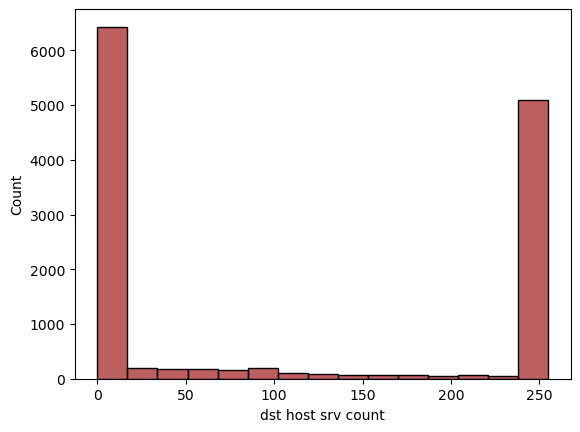

In [25]:
sns.histplot(train_df['dst host srv count'], color='brown')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dst host count', ylabel='Count'>

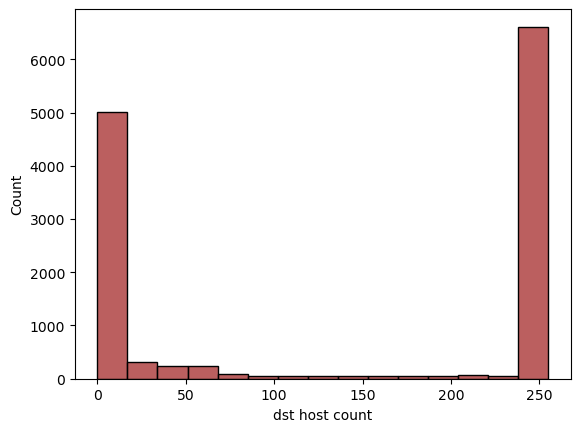

In [26]:
sns.histplot(train_df['dst host count'], color='brown')

In [27]:
# to check the correlation of the numerical variables in the data
correlation_matrix = train_df.select_dtypes('int64', 'float64').corr()
correlation_matrix

,Id,duration,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,logged in,...,num file creations,num shells,num access files,num outbound cmds,is host login,is guest login,count,srv count,dst host count,dst host srv count
Id,1.000000,0.005649,-0.020526,-0.001644,NaN,NaN,NaN,-0.019008,NaN,-0.013105,...,NaN,0.009075,0.008184,NaN,NaN,NaN,0.015862,0.003209,-0.002406,-0.005491
duration,0.005649,1.000000,-0.029560,-0.021751,NaN,NaN,NaN,-0.028704,NaN,-0.002758,...,NaN,-0.000758,-0.000758,NaN,NaN,NaN,-0.046010,-0.052506,0.048948,-0.063967
src bytes,-0.020526,-0.029560,1.000000,0.598952,NaN,NaN,NaN,0.994202,NaN,0.816359,...,NaN,-0.002934,-0.002928,NaN,NaN,NaN,-0.205069,-0.169107,0.240389,0.325002
dst bytes,-0.001644,-0.021751,0.598952,1.000000,NaN,NaN,NaN,0.597524,NaN,0.619881,...,NaN,-0.001632,0.001600,NaN,NaN,NaN,-0.155226,-0.116285,0.104982,0.245657
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,-0.019008,-0.028704,0.994202,0.597524,NaN,NaN,NaN,1.000000,NaN,0.811168,...,NaN,-0.003041,-0.003041,NaN,NaN,NaN,-0.203527,-0.169100,0.239819,0.321383
num failed logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logged in,-0.013105,-0.002758,0.816359,0.619881,NaN,NaN,NaN,0.811168,NaN,1.000000,...,NaN,0.020592,0.020592,NaN,NaN,NaN,-0.247175,-0.157587,0.116701,0.375028


In [28]:
import matplotlib.colors as mcolors

brown_cmap = mcolors.LinearSegmentedColormap.from_list("", ["#964B00", "#FFD700", "#FFC080"])
plt.register_cmap(name='brown_cmap', cmap=brown_cmap)

C:\Users\USER\AppData\Local\Temp\ipykernel_22064\2914769937.py:4: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(name='brown_cmap', cmap=brown_cmap)


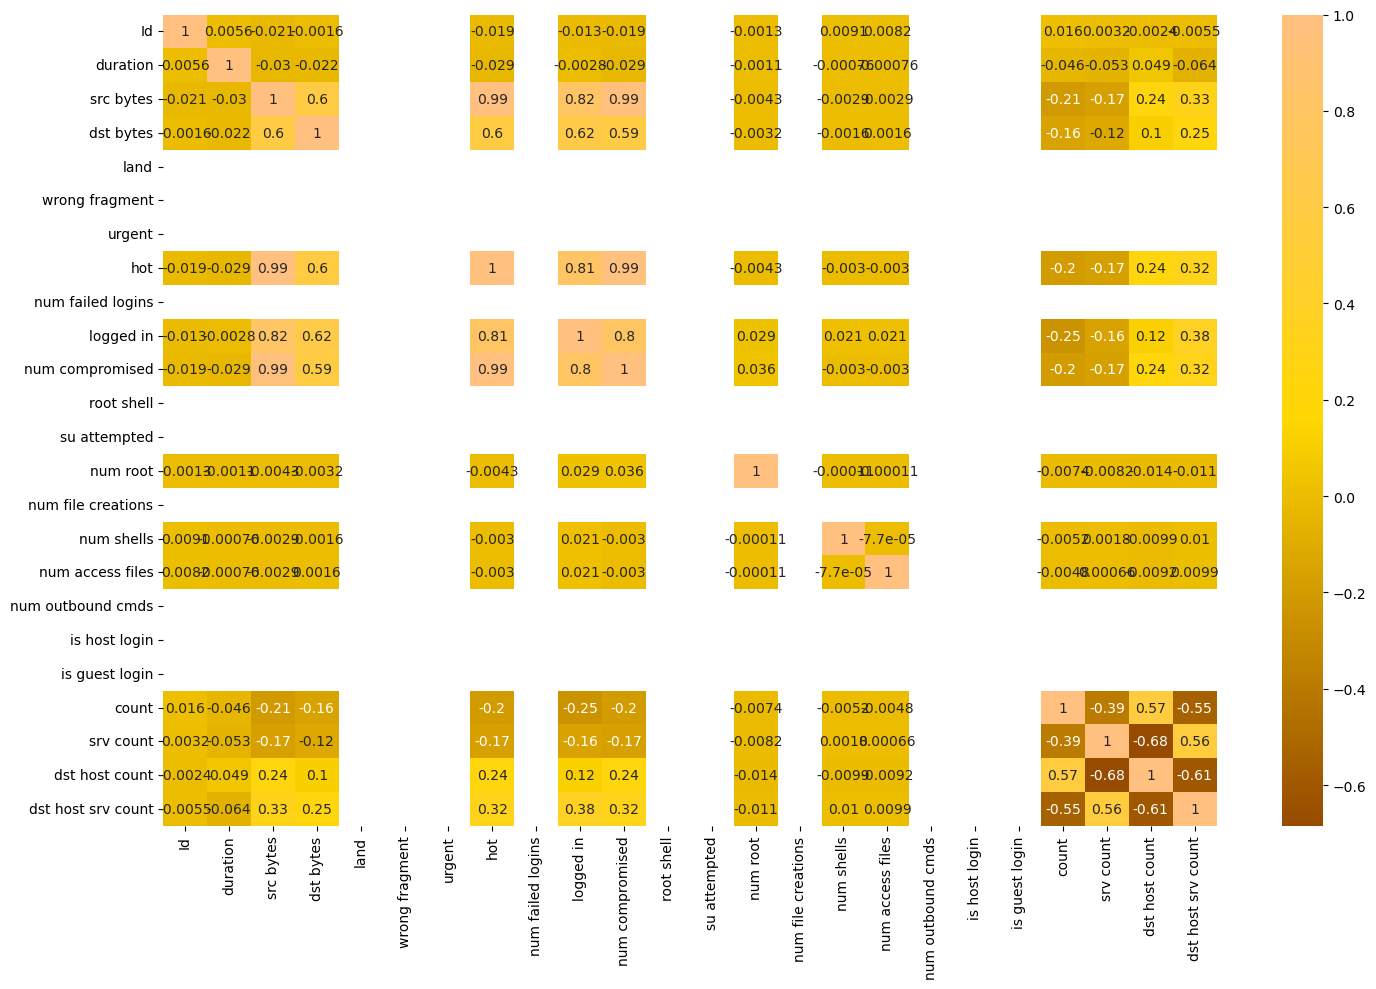

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='brown_cmap')
plt.tight_layout()

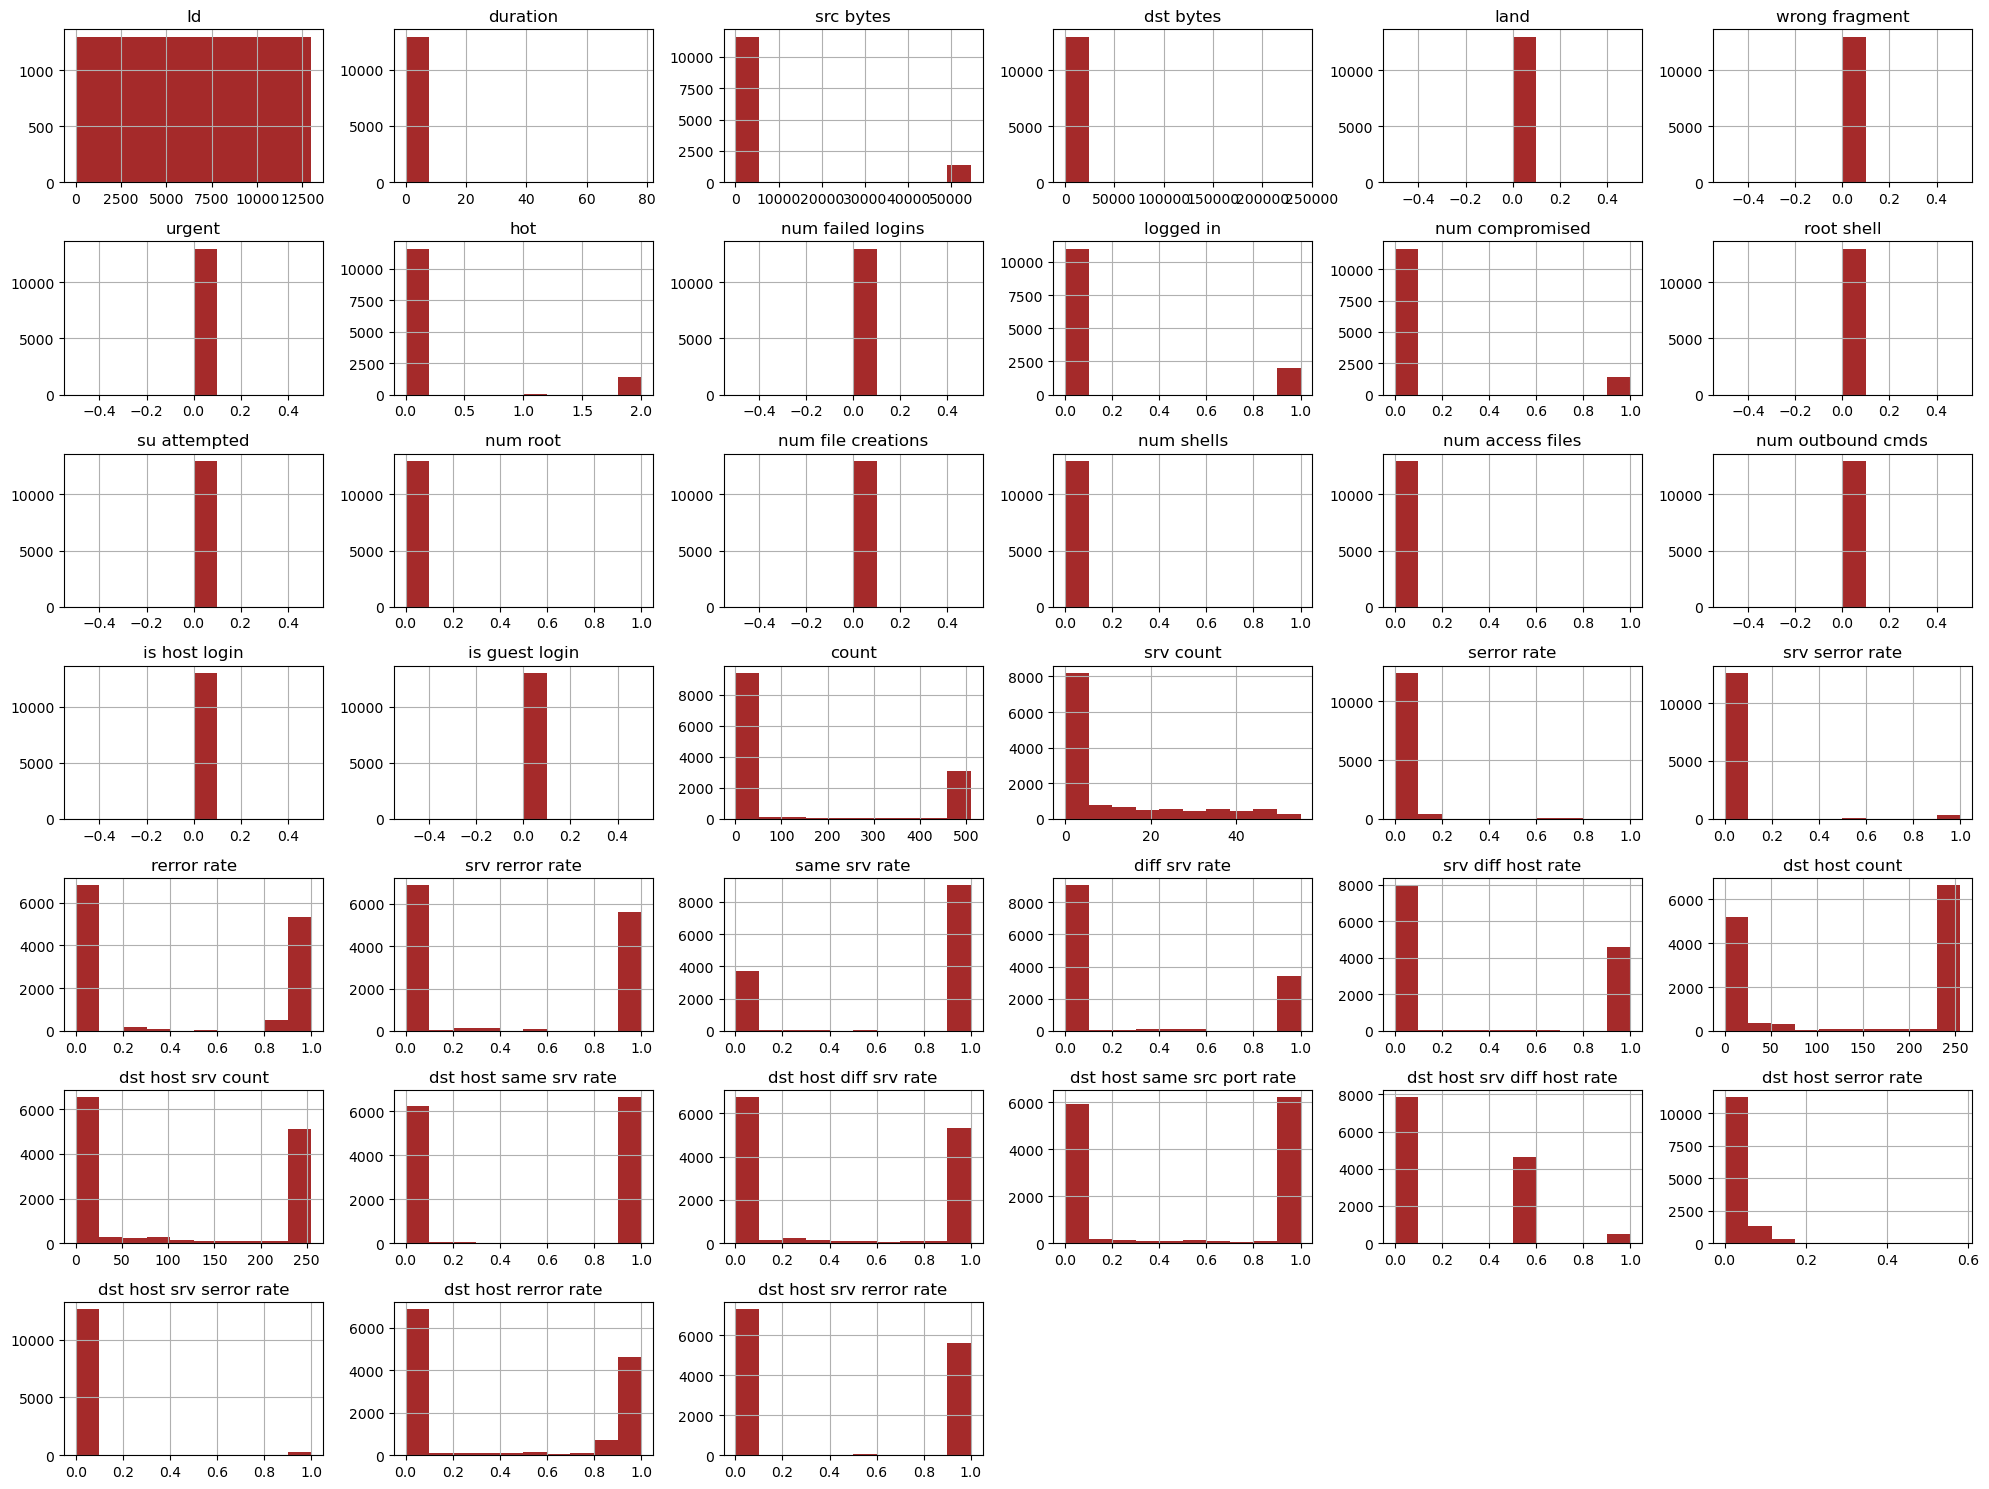

In [30]:
train_df.hist(figsize=(20,15),color='brown')
plt.tight_layout()

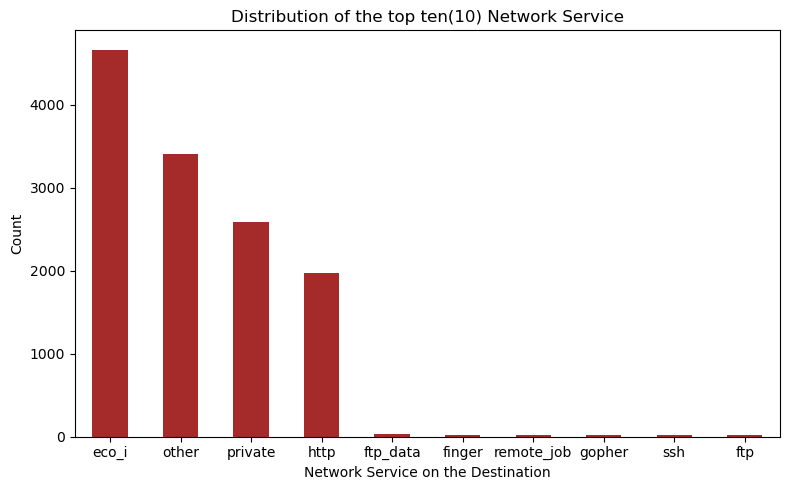

In [31]:
plt.figure(figsize=(8,5))
train_df['service'].value_counts().head(10).plot(kind='bar', color='brown')
plt.xlabel('Network Service on the Destination')
plt.ylabel('Count')
plt.title('Distribution of the top ten(10) Network Service')
plt.xticks(rotation=0)
plt.tight_layout()

In [32]:
# encoding the categorical variables
train_df = pd.get_dummies(train_df, columns=['protocol type', 'service', 'flag'])

In [33]:
train_df.head()

,Id,duration,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,logged in,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF
0,1,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,2,0,54540,8314,0,0,0,2,0,1,...,False,False,False,False,False,False,False,False,False,True
2,3,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3,4,0,8,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,5,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [34]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

In [35]:
# scaling the numerical variables using min-max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

In [36]:
train_df.head()

,Id,duration,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,logged in,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF
0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,0.000077,0.0,1.000000,0.03482,0.0,0.0,0.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2,0.000154,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,0.000231,0.0,0.000147,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0.000308,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [37]:
X_train = train_df.drop('type of attack', axis=1)

In [38]:
X_train.head()

,Id,duration,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,logged in,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_SF
0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,0.000077,0.0,1.000000,0.03482,0.0,0.0,0.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2,0.000154,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,0.000231,0.0,0.000147,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0.000308,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [39]:
y_train = train_df['type of attack']
y_train.head()

0      satan.
1       back.
2      satan.
3    ipsweep.
4      satan.
Name: type of attack, dtype: object

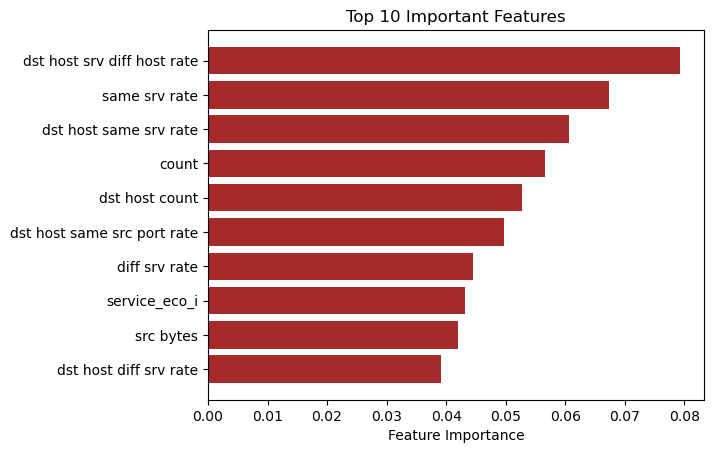

In [40]:
# using Random Forest Classifier to determine feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Getting feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Sorting and plotting the most important features
indices = importances.argsort()[-10:]  # to get indices for top 10 features
plt.barh(range(len(indices)), importances[indices], align='center', color='brown')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()

## Model Development

In [41]:
# creating a list of the top ten features
top_10_features = X_train[['dst host srv diff host rate', 'same srv rate', 'dst host same srv rate', 'count', 'dst host count', 'dst host same src port rate', 'diff srv rate', 'service_eco_i', 'src bytes', 'dst host diff srv rate']]

In [42]:
from sklearn.model_selection import train_test_split

# Using only the top 10 features in the train-test split
X_top_10 = top_10_features
y = train_df['type of attack']

# Performing train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

# X_train and X_test now contain only the top 10 features
# y_train and y_test contain the target variable

In [43]:
# building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam

# Reshaping the data because CNN expects a 3D input (samples, time_steps, features)
# Reshaping to (samples, 1, features) for a 1D CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Creating the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))

# Adding a pooling layer to reduce dimensions
model.add(MaxPooling1D(pool_size=1))

# Flattening the input for the Dense layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Output layer (using 'softmax' for multi-class classification)
model.add(Dense(5, activation='softmax'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Mapping string labels to numeric labels
label_mapping = {'ipsweep': 0, 'satan': 1, 'portsweep': 2, 'back': 3, 'normal': 4}

# Applying the mapping to the target columns
y_train_cleaned = y_train.str.strip().str.replace('.', '', regex=False).map(label_mapping)
y_test_cleaned = y_test.str.strip().str.replace('.', '', regex=False).map(label_mapping)

# One-hot encoding using to_categorical
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_cleaned, num_classes=5)
y_test_encoded = to_categorical(y_test_cleaned, num_classes=5)

In [45]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [46]:
print(X_train_reshaped.shape)
print(y_train_encoded.shape)
print(X_test_reshaped.shape)
print(y_test_encoded.shape)

(10391, 1, 10)
(10391, 5)
(2598, 1, 10)
(2598, 5)


In [47]:
assert X_train_reshaped.shape[0] == y_train_encoded.shape[0], "Mismatched number of samples"
assert X_test_reshaped.shape[0] == y_test_encoded.shape[0], "Mismatched number of samples"

In [48]:
X_train_reshaped = np.array(X_train_reshaped)
y_train_encoded = np.array(y_train_encoded)

In [49]:
X_test_reshaped = X_test_reshaped.astype('float32')
X_train_reshaped = X_train_reshaped.astype('float32')

In [50]:
# Training the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 47s 143ms/step - accuracy: 0.8412 - loss: 0.6092 - val_accuracy: 0.9665 - val_loss: 0.0647
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.9740 - loss: 0.0596 - val_accuracy: 0.9938 - val_loss: 0.0401
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9942 - val_loss: 0.0206
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 47s 145ms/step - accuracy: 0.9953 - loss: 0.0176 - val_accuracy: 0.9958 - val_loss: 0.0156
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9962 - val_loss: 0.0149
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 0.9973 - val_loss: 0.0107
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.9977 - val_loss: 0.0096
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9983 - loss: 0

In [51]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9976 - loss: 0.0078
Test Accuracy: 0.9973056316375732
Test Loss: 0.010530836880207062


## Plotting Training History

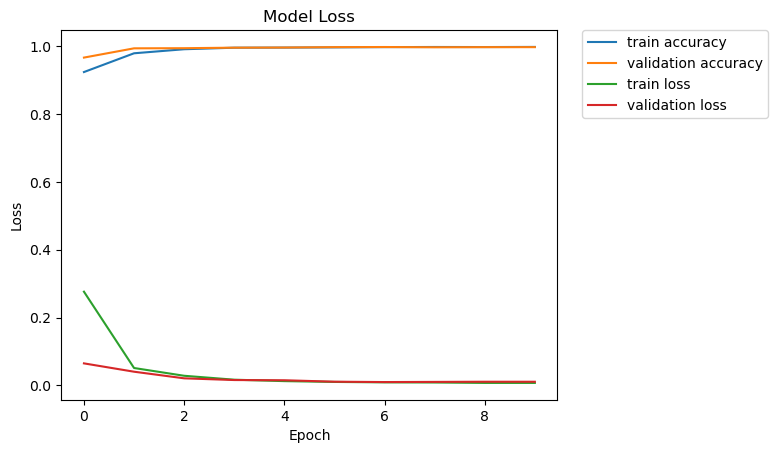

In [52]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plotting loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Making Prediction 

In [53]:
y_pred = model.predict(X_test_reshaped)

# Converting predictions from one-hot encoding back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


## Evaluating the model's performance

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_labels, target_names=['ipsweep', 'satan', 'portsweep', 'back', 'normal']))

              precision    recall  f1-score   support

     ipsweep       1.00      1.00      1.00      1088
       satan       1.00      0.99      1.00       710
   portsweep       0.99      1.00      1.00       410
        back       1.00      1.00      1.00       268
      normal       0.98      1.00      0.99       122

    accuracy                           1.00      2598
   macro avg       0.99      1.00      1.00      2598
weighted avg       1.00      1.00      1.00      2598



Text(0.5, 1.0, 'Confusion Matrix')

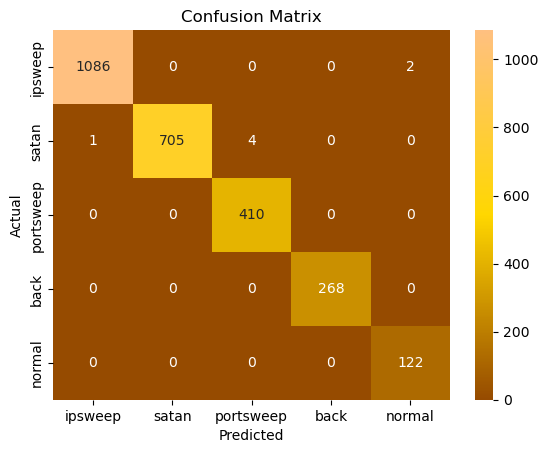

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='brown_cmap', xticklabels=['ipsweep', 'satan', 'portsweep', 'back', 'normal'], yticklabels=['ipsweep', 'satan', 'portsweep', 'back', 'normal'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [56]:
model.save('Leslie_network_attack_model.h5')

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizing the output labels
y_test_binarized = label_binarize(y_test_labels, classes=[0, 1, 2, 3, 4])

# Predicting probabilities
y_pred_probs = model.predict(X_test_reshaped)

# Calculating ROC-AUC for each class
roc_auc = roc_auc_score(y_test_binarized, y_pred_probs, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
ROC-AUC Score: 0.9999637845427388


In [58]:
# Cross Validation

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

def create_model():
    # Defining the CNN model architecture
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Compiling the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [59]:
from sklearn.model_selection import KFold
import numpy as np

# Since create_model() is the CNN model function
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X_train_reshaped):
    X_train_cv, X_val_cv = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_cv, y_val_cv = y_train_encoded[train_index], y_train_encoded[val_index]
    
    # Building and training model
    model = create_model()
    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)
    
    # Evaluating the model
    scores = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    print(f"Validation accuracy: {scores[1]}")
    cv_scores.append(scores[1])

# Outputing cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.996632993221283
Validation accuracy: 0.9980750679969788
Validation accuracy: 0.9980750679969788
Validation accuracy: 0.9971126317977905
Validation accuracy: 0.9980750679969788
Cross-validation scores: [0.996632993221283, 0.9980750679969788, 0.9980750679969788, 0.9971126317977905, 0.9980750679969788]
Mean CV Accuracy: 0.997594165802002


In [62]:
# Saving the scaler and the one-hot encoded column names

import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(train_df.columns.to_list(), 'encoded_columns.pkl')

['encoded_columns.pkl']

In [64]:
numerical_columns.to_list()

['Id',
 'duration',
 'src bytes',
 'dst bytes',
 'land',
 'wrong fragment',
 'urgent',
 'hot',
 'num failed logins',
 'logged in',
 'num compromised',
 'root shell',
 'su attempted',
 'num root',
 'num file creations',
 'num shells',
 'num access files',
 'num outbound cmds',
 'is host login',
 'is guest login',
 'count',
 'srv count',
 'serror rate',
 'srv serror rate',
 'rerror rate',
 'srv rerror rate',
 'same srv rate',
 'diff srv rate',
 'srv diff host rate',
 'dst host count',
 'dst host srv count',
 'dst host same srv rate',
 'dst host diff srv rate',
 'dst host same src port rate',
 'dst host srv diff host rate',
 'dst host serror rate',
 'dst host srv serror rate',
 'dst host rerror rate',
 'dst host srv rerror rate']

In [ ]:
train